In [1]:
from get_fibers import *
from SectionLib import *

to install dependencies, run

```
pip install opensees
```

In [2]:
inch, ft = 1, 12.0

## 1) The `Octagon` Builder

The `Octagon` function can be called in 3 ways:

- `Octagon(radius)`
- `Octagon(extRad, intRad)`
- `Octagon(extRad, extRad)` (ie, two equal radii)

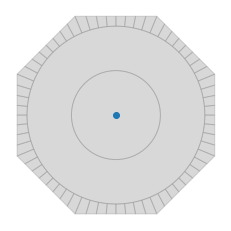

In [3]:
render.section(Octagon(20));

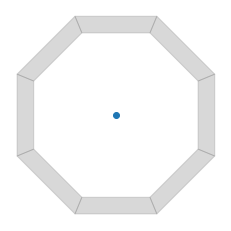

In [4]:
render.section(Octagon(20, 18));

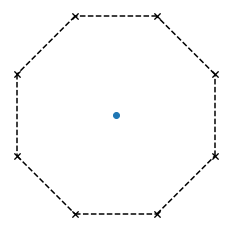

In [5]:
render.section(Octagon(20, 20),marker="x");

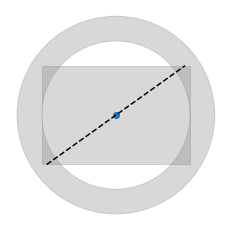

In [19]:
render.section(
    section.FiberSection(fibers=[
        patch.circ(extRad=20, intRad=15),
        layer.line(vertices=[[-14, -10], [14, 10]]),
        patch.rect(vertices=[[-15, -10], [15, 10]]),
        # *Octagon(18).patches
    ])
);

## PART 2: Define damage state regions

In [7]:
Dcol = 7*ft
cover = 2*inch

In [8]:
DS = {
  # Any outermost cover fiber
  "dsr1" : {
      "regions": [Octagon(Dcol/2, Dcol/2)]
  },
  "dsr2" : {
      "regions": [Octagon(Dcol/2.1, Dcol/2.2)],
      "material": "*steel*"
  },
  # Any cover fiber at 1/2 - 3/4 cover depth
  "dsr3" : {
      #         internal radius         external radius
      "regions": [Octagon(Dcol/2-cover*(1-0.5), Dcol/2-cover*(1-0.75))],
  },
}

## PART 3: Iterating over fibers

In [9]:
out_file = "$dataDir/DynResponse/recorders.txt"
model_file = "modelDetails.json"
elements = [4020]

In [10]:
with open(model_file, "r") as f:
    model = json.load(f)

In [11]:
ds1_fibers = np.array([
    f["coord"] for e,s,f in iter_elem_fibers(elements, model, DS["dsr1"])
])

ds2_fibers = np.array([
    f["coord"] for e,s,f in iter_elem_fibers(elements, model, DS["dsr2"])
])

ds3_fibers = np.array([
    f["coord"] for e,s,f in iter_elem_fibers(elements, model, DS["dsr3"])
])

## PART 3 - Visualizing

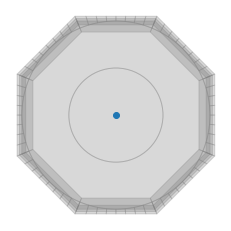

In [12]:
# add damage region to section that we're plotting
sect = Octagon(Dcol/2)
sect.add_patches(
    DS["dsr1"]["regions"][0].patches +
    DS["dsr2"]["regions"][0].patches +
    DS["dsr3"]["regions"][0].patches
)
ax = render.section(sect)

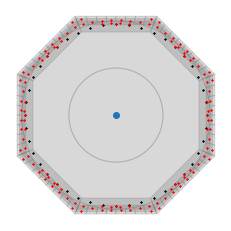

In [13]:
# Create grid of points
import numpy as np
ax = render.section(sect)
ax.scatter(*list(zip(*ds2_fibers)), color="black", s=0.5);
ax.scatter(*list(zip(*ds3_fibers)), color="red",   s=0.5);
# ax.scatter(*list(zip(*ds1_fibers)), color="blue",  s=0.5);

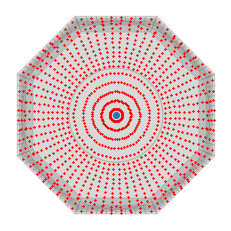

In [14]:
ax = render.section(sect)
ax.scatter(*list(zip(*[
    f["coord"] for _,__,f in iter_elem_fibers([4020], model)
])), color="red", s=0.5);

In [15]:
Octagon(20)